In [10]:
import curvedsky as cs
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('../')
import numpy as np
from utils import cli

In [11]:
import healpy as hp

In [12]:
%load_ext autoreload
%autoreload 2
from quest import RecoBase

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
clpp = RecoBase.from_ini('../litebirdFG1.ini')

An extra Mask is applied to data. Previous fsky is 0.80 and new fsky = 0.70


/tmp/ipykernel_4511/2991096160.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/clpp.NL[0][0])
/tmp/ipykernel_4511/2991096160.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/clpp.NL[1][0])


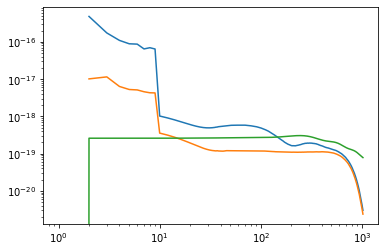

In [21]:
plt.loglog(1/clpp.NL[0][0])
plt.loglog(1/clpp.NL[1][0])
plt.loglog(clpp.cl_len[2,:])

In [15]:
E,B = clpp.get_falm_sim(0)

/tmp/ipykernel_4511/3339397569.py:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/clpp.cl_len[2,:])


(200, 1024)

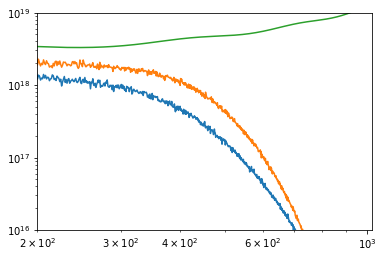

In [20]:
plt.loglog(cs.utils.alm2cl(clpp.lmax,B))
plt.loglog(cs.utils.alm2cl(clpp.lmax,b))
plt.loglog(1/clpp.cl_len[2,:])
plt.ylim(10**16,10**19)
plt.xlim(200,1024)

In [18]:
clpp1 = RecoBase.from_ini('../litebird.ini')

In [19]:
e,b = clpp1.get_falm_sim(0)

(400, 1200)

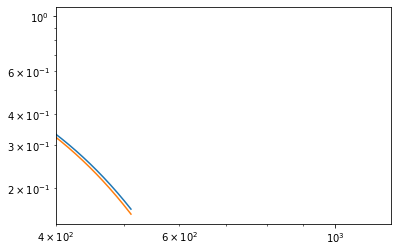

In [26]:
plt.loglog(hp.gauss_beam(np.radians(.5)))
plt.loglog(hp.gauss_beam(np.radians(.5))*hp.pixwin(512)[:513])
plt.xlim(400,1200)